In [215]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [241]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

boarding = pd.read_csv('/Work/ulka/Wadala_depot_boarding_march.csv', parse_dates=[0] ,date_parser=parser)

In [217]:
boarding.Date[1]

Timestamp('2020-03-02 00:00:00')

In [218]:
boarding.head()
boarding.set_index('Date', inplace=True)
boarding.index = pd.to_datetime(boarding.index)

In [243]:
boarding.head()

,Date,Boarding
0,2020-03-01,8
1,2020-03-02,15
2,2020-03-03,13
3,2020-03-04,16
4,2020-03-05,20


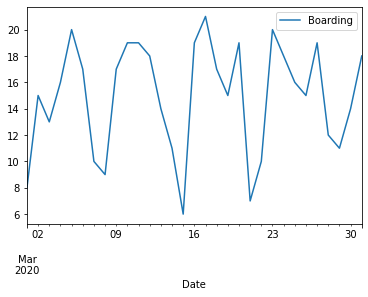

In [219]:
boarding.plot()

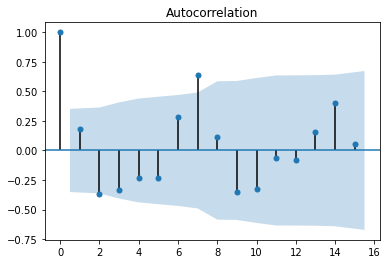

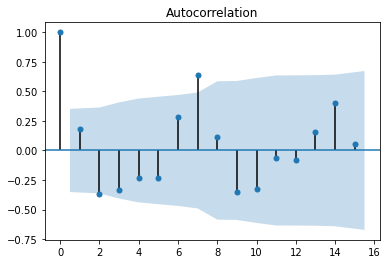

In [220]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(boarding)

In [221]:
boarding_diff = boarding.diff(periods= 1)

In [222]:
boarding_diff.head()

,Boarding
Date,
2020-03-01,NaN
2020-03-02,7.0
2020-03-03,-2.0
2020-03-04,3.0
2020-03-05,4.0


## INTEGRATED OF ORDER 1

In [223]:
boarding_diff = boarding_diff[1:]
boarding_diff.head()

,Boarding
Date,
2020-03-02,7.0
2020-03-03,-2.0
2020-03-04,3.0
2020-03-05,4.0
2020-03-06,-3.0


In [224]:
boarding.head()

,Boarding
Date,
2020-03-01,8
2020-03-02,15
2020-03-03,13
2020-03-04,16
2020-03-05,20


In [225]:
boarding.shift(1)

,Boarding
Date,
2020-03-01,NaN
2020-03-02,8.0
2020-03-03,15.0
2020-03-04,13.0
2020-03-05,16.0
2020-03-06,20.0
2020-03-07,17.0
2020-03-08,10.0
2020-03-09,9.0


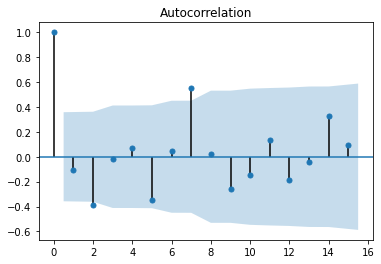

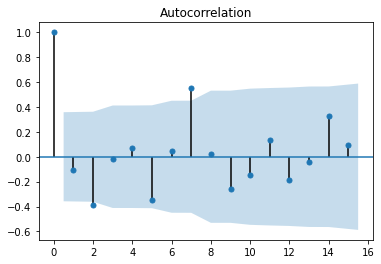

In [226]:
plot_acf(boarding_diff)

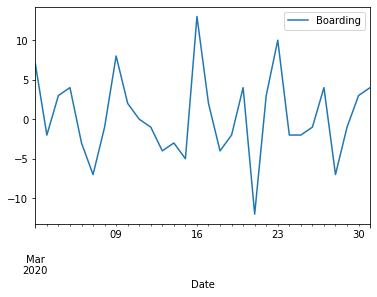

In [227]:
boarding_diff.plot()

# Autoreggresive AR Model

In [228]:
X = boarding.values
train = X[0:24] # 24 data as train data
test = X[24:]  # 7 data as test data
predictions = []

In [244]:
test.size


7

In [230]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [231]:
prediction = model_ar_fit.predict(start=24,end=30)

In [232]:
test

array([[16],
       [15],
       [19],
       [12],
       [11],
       [14],
       [18]], dtype=int64)

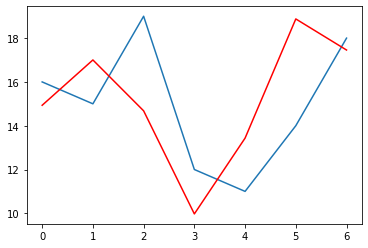

In [245]:
plt.plot(test)
plt.plot(predictions,color='red')

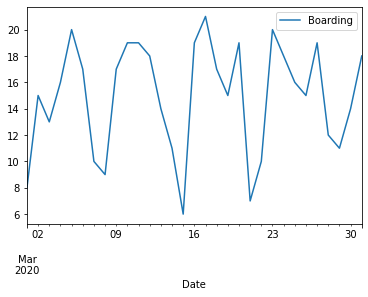

In [234]:
boarding.plot()

# ARIMA model

In [235]:
from statsmodels.tsa.arima_model import ARIMA

In [236]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4,0,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

123.59876373833495


In [237]:
predictions= model_arima_fit.forecast(steps=7)[0]
predictions

array([14.93367612, 17.00387899, 14.67991391,  9.9713288 , 13.43350664,
       18.87675947, 17.45754577])

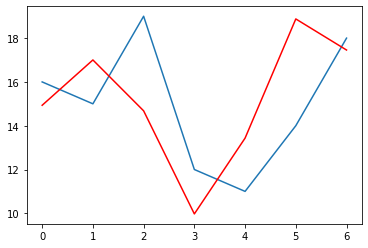

In [238]:
plt.plot(test)
plt.plot(predictions,color='red')

In [239]:
mean_squared_error(test,predictions)

8.275746050163644

In [240]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [214]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 144.09811621239257
(0, 0, 1) 143.26501540564288
(0, 0, 2) 137.59275381279485
(0, 0, 3) 138.06219530893057
(0, 0, 4) 132.47681295974627
(0, 1, 0) 148.40246088818452
(0, 1, 1) 144.03992465891776
(0, 1, 2) 142.54869034513064
(0, 1, 3) 140.66995778878908
(0, 1, 4) 140.25058026119297
(0, 2, 0) 159.83320579560697
(0, 2, 1) 148.17333475870623
(0, 2, 2) 147.95996814681862
(0, 2, 3) 145.06769932682283
(0, 2, 4) 146.9458960401168
(1, 0, 0) 145.12491010198016
(1, 0, 1) 143.02213837662242
(1, 1, 0) 150.13348899371385
(1, 1, 1) 144.54401567585188
(1, 2, 0) 158.94679196981957
(1, 2, 1) 150.08854845328779
(1, 2, 2) 151.84490815248802
(2, 0, 0) 141.68002101749263
(2, 0, 1) 133.87810243321016
(2, 0, 2) 128.75928804298516
(2, 1, 0) 147.8673318976173
(2, 1, 1) 142.27568008518034
(2, 1, 2) 138.27498198387627
(2, 1, 3) 148.77400423657394
(2, 2, 0) 153.83567288766295
(2, 2, 1) 148.5195869475552
(2, 2, 2) 145.99377562855733
(2, 2, 3) 151.78742628188562
(3, 0, 0) 142.8120620121826
(3, 0, 1) 134.3345

In [246]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [247]:
wmal_credentials = {
  "apikey": "ycTOqFEd2NHkWjDVZgSyXdei18dB38LGTaQc56kXb9aH",
  "iam_apikey_description": "Auto-generated for key 1c8bc1d0-9624-4415-9a56-46f9ade22209",
  "iam_apikey_name": "Service credentials-2",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/77c6fa78173d4e79b05bbbff95d78a8a::serviceid:ServiceId-584b5dab-ecfc-47d8-9af5-5de5020224cd",
  "instance_id": "f072af13-d309-42b8-9718-617d23a56d2a",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [248]:
client = WatsonMachineLearningAPIClient(wmal_credentials)

In [249]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Komal',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'komal.sudrik@gmail.com',
    client.repository.ModelMetaNames.NAME : 'BoardingPrediction'
}

In [250]:
stored_data = client.repository.store_model(model_arima,meta_props = metadata)

2020-06-28 17:22:44,568 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-28 17:22:44,570 - watson_machine_learning_client.wml_client_error - WARNING - Publishing model failed.
Reason: Invalid type for ml_artifact: ARMA


WMLClientError: Publishing model failed.
Reason: Invalid type for ml_artifact: ARMA